<h3>Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import joblib

<h3>Reading and Viewing Data

In [2]:
df = pd.read_csv("wine.csv")
df.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
df.shape

(178, 14)

<h3>Checking the NULL values

In [5]:
df.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

<h3>Plotting the Boxplots

C:\Users\Razi\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Users\Razi\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Users\Razi\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

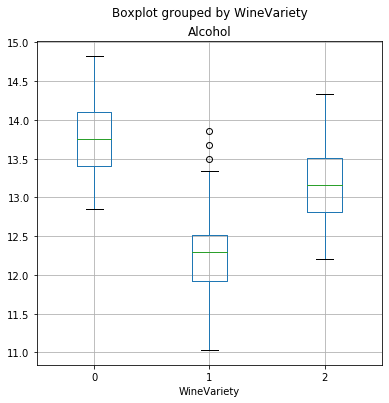

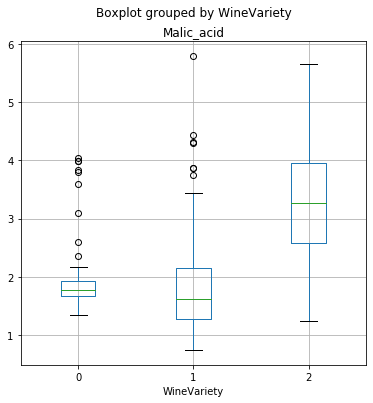

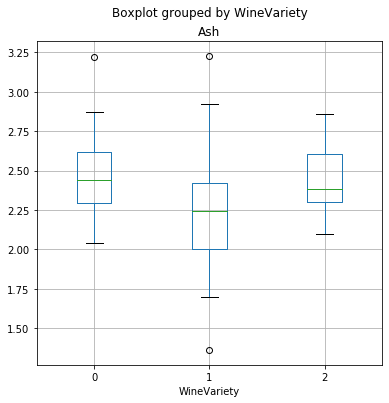

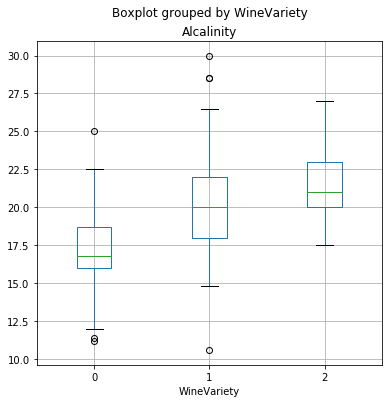

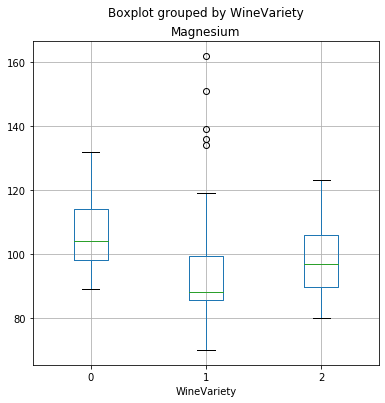

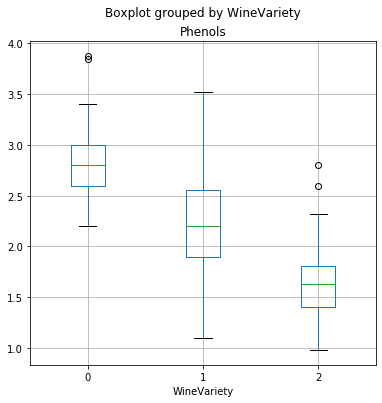

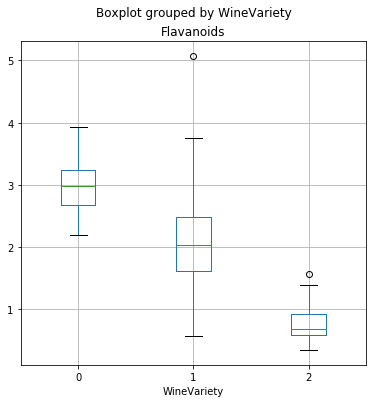

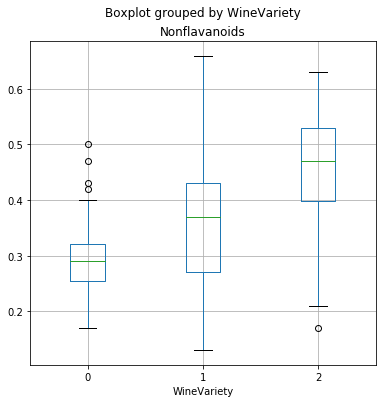

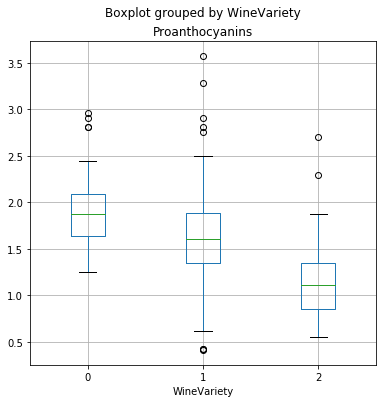

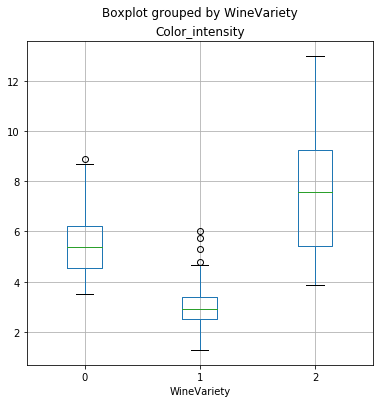

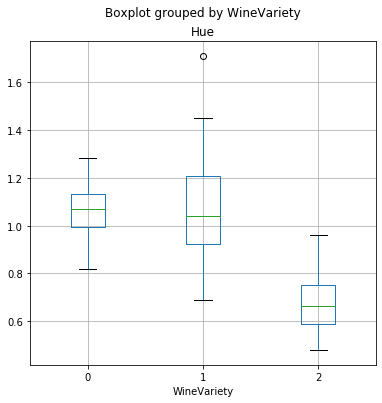

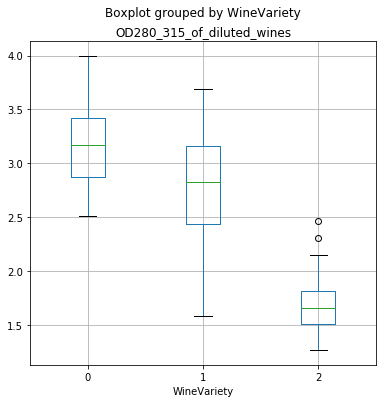

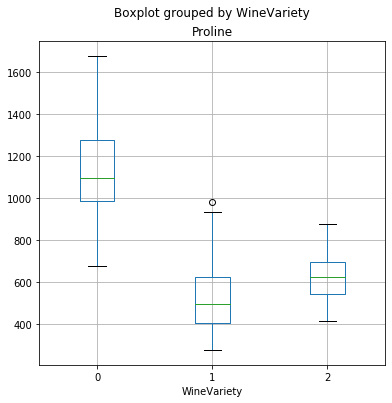

In [6]:
features = ["Alcohol", "Malic_acid","Ash","Alcalinity","Magnesium","Phenols","Flavanoids","Nonflavanoids","Proanthocyanins",
            "Color_intensity","Hue","OD280_315_of_diluted_wines","Proline"]
label = "WineVariety"

for col in features:
    df.boxplot(column=col, by=label, figsize=(6,6))

<h3>Getting the Categorical and Numeric features

In [7]:
df.dtypes

Alcohol                       float64
Malic_acid                    float64
Ash                           float64
Alcalinity                    float64
Magnesium                       int64
Phenols                       float64
Flavanoids                    float64
Nonflavanoids                 float64
Proanthocyanins               float64
Color_intensity               float64
Hue                           float64
OD280_315_of_diluted_wines    float64
Proline                         int64
WineVariety                     int64
dtype: object

Since there are other numeric columns, we'll work only with the numeric columns

<h3>Splitting the data into Train and Test

In [8]:
X, y = df[features], df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (124, 13)
X_test: (54, 13)
y_train: (124,)
y_test: (54,)


<h3>Creating a Pipeline for preprocessing the model

In [9]:
feature_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(transformers=[("preprocess", feature_transformer, features)])

pipeline_log = Pipeline(steps=[("preprocessor", preprocessor), 
                               ("logRegression", LogisticRegression(solver='lbfgs', multi_class='auto'))])

model_log = pipeline_log.fit(X_train, y_train)
predictions_log = model_log.predict(X_test)

In [10]:
cl_report_log = classification_report(y_test, predictions_log)
print(cl_report_log)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



<h3>Finding the AUC and ROC

In [11]:
probabilities_log = model_log.predict_proba(X_test)
auc = roc_auc_score(y_test, probabilities_log, multi_class='ovr')
print(auc)

1.0


The AUC looks promising which means the Logistic Regression model performs pretty well. It is now time to test is against some unseen data.

<h3>Dumping the model

In [12]:
#saving the model
filename = "./model_log.pkl"
joblib.dump(model_log, filename)

['./model_log.pkl']

<h3>Loading the model

In [13]:
model = joblib.load(filename)

#new data
X_new = pd.DataFrame([[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]], columns=features)
predictions = model.predict(X_new)
print(predictions)

[1]


The model has predicted it correctly.